# Data Science training from Sprints

## Welcome to Team 15

Team members: <br>
Mohamed Aly Elsayed Matar <br>
Mohamed Abdelmoniem <br>
Mohamed Fathy <br>
Karim Ashraf <br>
Ziad Assem <br>

From Faculty of Engineering, Ain Shams University<br>
CESS Program<br>

# What will we do?

What's our question/objective? <br>
Selecting the data that we will need <br>
Cleaning the data <br>
Perform Time Series Analysis <br>
Modeling our Data and Predicting <br>

Yay! by the end we should have an answer to our question (that's what we thought XD) <br>

## What's our question/objective?

We are trying to predict which country will the next custom travel trip probably be :)

## Selecting the data that we will need

We have 6 data lists provided by the AirBnb challenge: <br>
<ol>
    <li> sample_submisions_NDF </li>
    <li> countries </li>
    <li> sessions </li>
    <li> age_gender_bucket </li>
    <li> test_users </li>
    <li> train_users_2 </li>
</ol>

<h2>The following data lists are the ones that we wont need "We thought :)" </h2>
<ul>
    <li> sample_submissions_NDF, <br>Not really helpful since all the countries destinations are NDF.</li>
    <li> countries, <br>Just information about the countries, not usefull for predicting. </li>
    <li> sessions, <br>Contains the actions that each user did while using the website, mmm... I don't think this will help. </li>
    <li> age_gender_bkts, <br>Contains information about the age and gender of each user which is already in the user's data lists. </li>
</ul>

<h2>The following data lists are the ones that we will work on</h2>
<ul>
    <li> test_users </li>
    <li> train_users_2 </li> 
</ul>

<h3>Importing our libraries :)</h3>

In [1]:
import numpy as np              #Arrays & matrices
import pandas as pd             #Data structures & tools
import seaborn as sns           #plots: heat maps, time series, violin plots
import matplotlib.pyplot as plt #plots & graphs
%matplotlib inline

import datetime as dt
import itertools

#for modeling, testing, traing, predicting, etc.
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm

#colors = ['blue','green','orange','red'] #colors we will need in viualization :)

ModuleNotFoundError: No module named 'statsmodels'

In [ ]:
#now, let's get the data that we will work on
trainers = pd.read_excel(r'C:\Airbnb\Files\train_users_2.xlsx')
testers = pd.read_excel(r'C:\Airbnb\Files\test_users.xlsx')

# Merge train and test users
users = pd.concat((trainers, testers), axis=0, ignore_index=True)

<h3>Let's check our Data</h3>

In [ ]:
users.shape

(275547, 16)

In [ ]:
users.describe(include='all')

C:\Users\peace\AppData\Local\Temp\ipykernel_5956\2065043121.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  users.describe(include='all')


,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
count,275547,275547,2.755470e+05,88908,275547,158681.000000,275547,275547.000000,275547,275547,275547,269462,275547,275547,275547,213451
unique,275547,1726,NaN,1976,4,NaN,4,NaN,26,8,18,7,4,9,55,12
top,gxn3p5htnn,2014-07-23 00:00:00,NaN,2014-05-22 00:00:00,-unknown-,NaN,basic,NaN,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
freq,1,1105,NaN,248,129480,NaN,198222,NaN,265538,181571,181270,143181,219918,106328,78671,124543
first,NaN,2010-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2014-09-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2.013308e+13,NaN,NaN,47.145310,NaN,4.291965,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,9.146341e+09,NaN,NaN,142.629468,NaN,8.794313,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,2.009030e+13,NaN,NaN,1.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,2.013040e+13,NaN,NaN,28.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275547 entries, 0 to 275546
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   id                       275547 non-null  object        
 1   date_account_created     275547 non-null  datetime64[ns]
 2   timestamp_first_active   275547 non-null  int64         
 3   date_first_booking       88908 non-null   object        
 4   gender                   275547 non-null  object        
 5   age                      158681 non-null  float64       
 6   signup_method            275547 non-null  object        
 7   signup_flow              275547 non-null  int64         
 8   language                 275547 non-null  object        
 9   affiliate_channel        275547 non-null  object        
 10  affiliate_provider       275547 non-null  object        
 11  first_affiliate_tracked  269462 non-null  object        
 12  signup_app      

<h3>Let's clean the data</h3>

In [ ]:
users.replace('', np.nan, inplace = True)
users.replace('-unknown-', np.nan, inplace = True)

In [ ]:
#setting any users above 100 to null for more logical data
users.loc[(users.age > 95) | (users.age < 15), 'age'] = np.nan

In [ ]:
#users = users.drop(['id'],axis=1)   #no need for the id column
users.dropna(inplace=True)          #remove the null values
users.drop_duplicates(inplace=True) #remove duplicates
users.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
2,4ft3gnwmtx,2010-09-28,20090600000000,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091000000000,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
6,lsw9q7uk0j,2010-01-02,20100100000000,2010-01-05,FEMALE,46.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
7,0d01nltbrs,2010-01-03,20100100000000,2010-01-13,FEMALE,47.0,basic,0,en,direct,direct,omg,Web,Mac Desktop,Safari,US
8,a1vcnhxeij,2010-01-04,20100100000000,2010-07-29,FEMALE,50.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US


In [ ]:
#checking nan values
total = users.isnull().sum().sort_values(ascending=False)
percent = (users.isnull().sum()/users.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
id,0,0.0
date_account_created,0,0.0
timestamp_first_active,0,0.0
date_first_booking,0,0.0
gender,0,0.0
age,0,0.0
signup_method,0,0.0
signup_flow,0,0.0
language,0,0.0
affiliate_channel,0,0.0


<h3>We did before a visualization for all the possible data, so we will visaulize only what we will need</h3>

# Time Series Analysis

<h3>let's handle the timestamps and date data for our time series</h3>

Usually we would use format="%Y-%m-%d %H:%M:%S" in the to_datetime function, but here our data doesn't have a value for the day section and by the rules of the formate %d has a limit from 01 to 31 and can't be 00.

So that's why we skipped the days and wrote the formate like this "%Y-%m %H:%M:%S"

In [ ]:
#function to configure the timestamps to a workable type

def handle_timestamp(xx):
    xx = str(xx)
    yy = xx[0:4]+'-'+xx[4:6]+' '+xx[8:10]+':'+xx[10:12]+':'+xx[12:14]
    return yy

In [ ]:
#just making sure the dates are in datetime64[ns] type

users['date_account_created'] = pd.to_datetime(users['date_account_created'])
users['date_first_booking'] = pd.to_datetime(users['date_first_booking'])
users['timestamp_first_active'] = users['timestamp_first_active'].apply(handle_timestamp)
users['timestamp_first_active'].head()


2    2009-06 00:00:00
3    2009-10 00:00:00
6    2010-01 00:00:00
7    2010-01 00:00:00
8    2010-01 00:00:00
Name: timestamp_first_active, dtype: object

In [ ]:
users['timestamp_first_active'] = pd.to_datetime(users['timestamp_first_active'], format="%Y-%m %H:%M:%S")
users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51520 entries, 2 to 213445
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       51520 non-null  object        
 1   date_account_created     51520 non-null  datetime64[ns]
 2   timestamp_first_active   51520 non-null  datetime64[ns]
 3   date_first_booking       51520 non-null  datetime64[ns]
 4   gender                   51520 non-null  object        
 5   age                      51520 non-null  float64       
 6   signup_method            51520 non-null  object        
 7   signup_flow              51520 non-null  int64         
 8   language                 51520 non-null  object        
 9   affiliate_channel        51520 non-null  object        
 10  affiliate_provider       51520 non-null  object        
 11  first_affiliate_tracked  51520 non-null  object        
 12  signup_app               51520 

In [ ]:
users.describe(include='all')

C:\Users\peace\AppData\Local\Temp\ipykernel_5956\2065043121.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  users.describe(include='all')
C:\Users\peace\AppData\Local\Temp\ipykernel_5956\2065043121.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  users.describe(include='all')
C:\Users\peace\AppData\Local\Temp\ipykernel_5956\2065043121.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior no

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
count,51520,51520,51520,51520,51520,51520.000000,51520,51520.000000,51520,51520,51520,51520,51520,51520,51520,51520
unique,51520,1559,56,1885,3,NaN,3,NaN,23,8,16,7,4,9,34,11
top,4ft3gnwmtx,2014-05-20 00:00:00,2014-06-01 00:00:00,2014-05-14 00:00:00,FEMALE,NaN,basic,NaN,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
freq,1,145,3153,133,27588,NaN,30643,NaN,50137,34164,34104,26482,49045,27852,19919,36306
first,NaN,2010-01-02 00:00:00,2009-06-01 00:00:00,2010-01-05 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2014-06-30 00:00:00,2014-06-01 00:00:00,2015-06-29 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,36.172030,NaN,1.252213,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,11.155426,NaN,4.436448,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,15.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,28.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Let's add a column that help see who traveled and who didn't

In [ ]:
users['traveled'] = users['country_destination'].apply(lambda x: 'No' if x =='NDF' else 'Yes')
users.head(9)

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,traveled
2,4ft3gnwmtx,2010-09-28,2009-06-01,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US,Yes
3,bjjt8pjhuk,2011-12-05,2009-10-01,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other,Yes
6,lsw9q7uk0j,2010-01-02,2010-01-01,2010-01-05,FEMALE,46.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US,Yes
7,0d01nltbrs,2010-01-03,2010-01-01,2010-01-13,FEMALE,47.0,basic,0,en,direct,direct,omg,Web,Mac Desktop,Safari,US,Yes
8,a1vcnhxeij,2010-01-04,2010-01-01,2010-07-29,FEMALE,50.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US,Yes
10,yuuqmid2rp,2010-01-04,2010-01-01,2010-01-06,FEMALE,36.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Firefox,US,Yes
15,v4d5rl22px,2010-01-07,2010-01-01,2010-01-08,FEMALE,33.0,basic,0,en,direct,direct,untracked,Web,Windows Desktop,Chrome,CA,Yes
19,gdka1q5ktd,2010-01-10,2010-01-01,2010-01-10,FEMALE,29.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,FR,Yes
21,qsibmuz9sx,2010-01-10,2010-01-01,2010-01-11,MALE,30.0,basic,0,en,direct,direct,linked,Web,Mac Desktop,Chrome,US,Yes


In [ ]:
print(users['traveled'].value_counts())
traveled = users[users['traveled']=='Yes']
traveled.head()

Yes    51520
Name: traveled, dtype: int64


,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,traveled
2,4ft3gnwmtx,2010-09-28,2009-06-01,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US,Yes
3,bjjt8pjhuk,2011-12-05,2009-10-01,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other,Yes
6,lsw9q7uk0j,2010-01-02,2010-01-01,2010-01-05,FEMALE,46.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US,Yes
7,0d01nltbrs,2010-01-03,2010-01-01,2010-01-13,FEMALE,47.0,basic,0,en,direct,direct,omg,Web,Mac Desktop,Safari,US,Yes
8,a1vcnhxeij,2010-01-04,2010-01-01,2010-07-29,FEMALE,50.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US,Yes


Text(0.5, 1.0, 'New user accounts created')

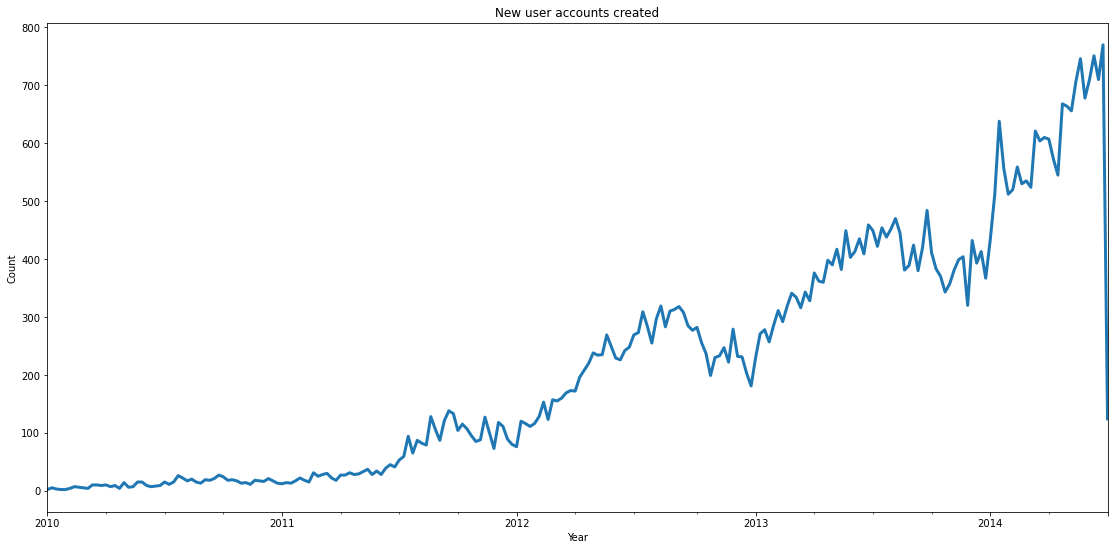

In [ ]:
plt.figure(figsize=(19,9))
traveled['date_account_created'].value_counts().resample('W').sum().plot.line(linewidth=3,label= 'Date of Booking')

plt.xlabel('Year')
plt.ylabel('Count')
plt.title('New user accounts created')

Text(0.5, 1.0, 'Date of first booking')

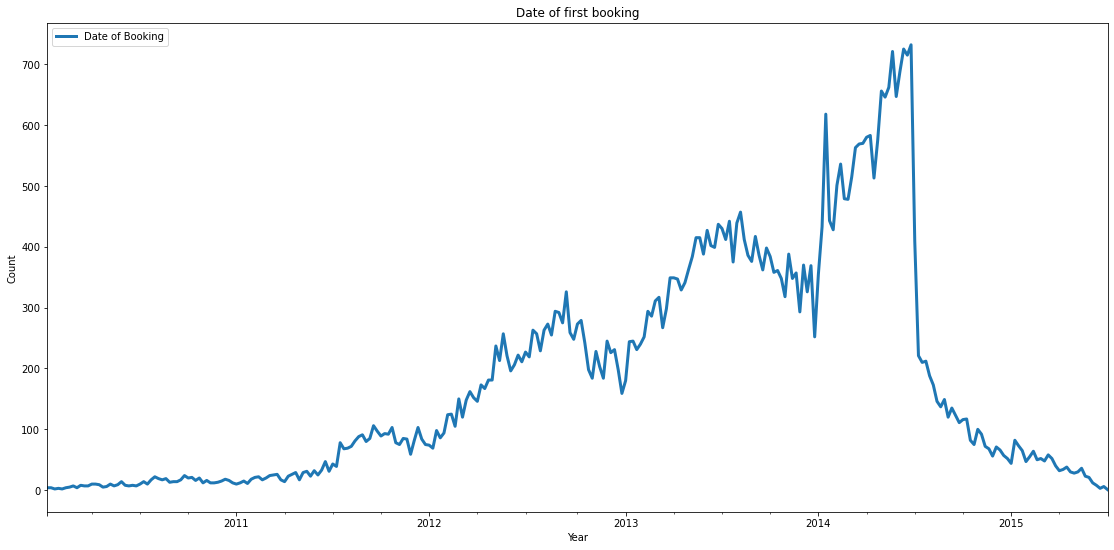

In [ ]:
plt.figure(figsize=(19,9))
traveled['date_first_booking'].value_counts().resample('W').sum().plot.line(linewidth=3,label= 'Date of Booking')
plt.legend(loc = 'upper left')

plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Date of first booking')

In [ ]:
# Min and Max date of the first booking dates
traveled['date_first_booking'].min(), traveled['date_first_booking'].max()

(Timestamp('2010-01-05 00:00:00'), Timestamp('2015-06-29 00:00:00'))

In [ ]:
traveled = traveled.set_index('date_account_created').dropna()
traveled.index

DatetimeIndex(['2010-09-28', '2011-12-05', '2010-01-02', '2010-01-03',
               '2010-01-04', '2010-01-04', '2010-01-07', '2010-01-10',
               '2010-01-10', '2010-01-12',
               ...
               '2014-06-30', '2014-06-30', '2014-06-30', '2014-06-30',
               '2014-06-30', '2014-06-30', '2014-06-30', '2014-06-30',
               '2014-06-30', '2014-06-30'],
              dtype='datetime64[ns]', name='date_account_created', length=51520, freq=None)

In [ ]:
y = traveled['date_first_booking'].dropna().value_counts().resample('MS').sum()
y

2010-01-01     13
2010-02-01     18
2010-03-01     32
2010-04-01     30
2010-05-01     45
             ... 
2015-02-01    218
2015-03-01    218
2015-04-01    142
2015-05-01    118
2015-06-01     30
Freq: MS, Name: date_first_booking, Length: 66, dtype: int64

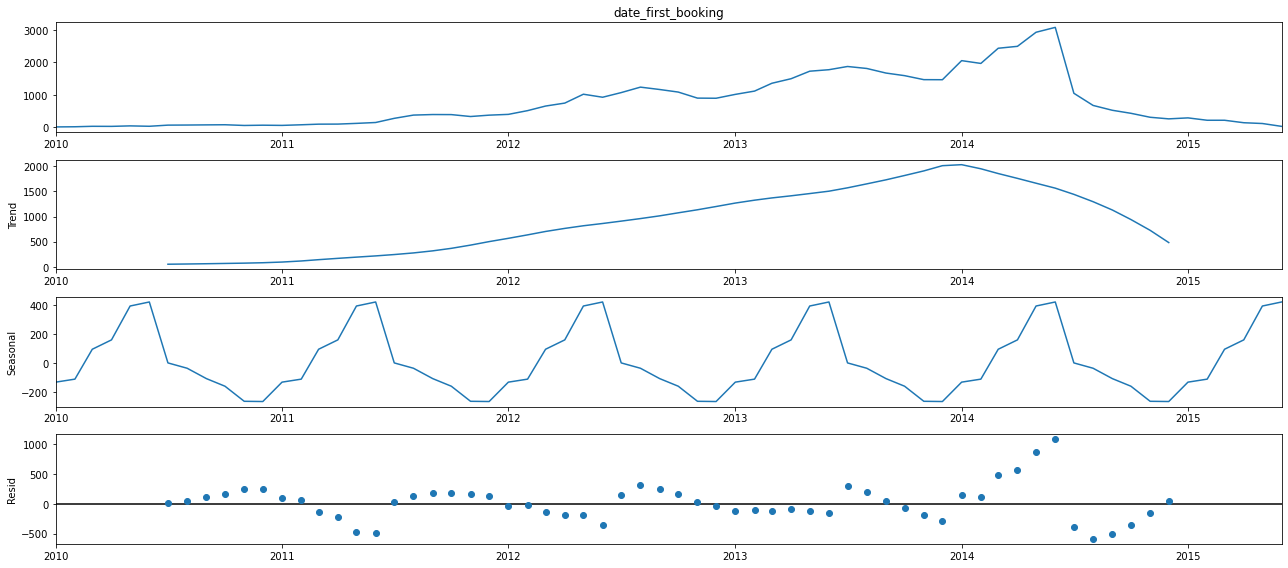

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

<h3>Now, let's forecast with ARIMA</h3>

We discovered that a lot of things happen here :)<br>

Take care, this section can hurt your eye!

In [ ]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Samples of how parameter combinations look for Seasonal ARIMA:')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Samples of how parameter combinations look for Seasonal ARIMA:
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [ ]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y, order=param, seasonal_order=param_seasonal, 
                                            enforce_stationarity=False, enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1098.3587060751138
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:885.0433367277004
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:890.6620817612251
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:696.291569021465
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:898.0107294433403
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:883.2551973502075
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:715.0445833964196
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:695.3091928454378
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1008.3954522605491
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:816.7688716954835
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:824.6617801139944
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:639.2214241724319
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:843.7696648702955
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:816.2879706427898
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:672.5388659289906
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:641.0838844166149
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:911.5539005722922
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:753.1425402547899
ARIMA(0, 

C:\Users\peace\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:741.6142999978409
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:744.297068050669
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:581.0348016748683
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:767.2633889304115
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:742.4564981992544
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:608.9991172470178
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:583.0228505546582
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:925.6241498446523
ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:767.5448943703598
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:771.3475072899741
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:609.3825881650026
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:767.1627040491926
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:769.1250047381772
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:609.6217661084307
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:611.3668522056553
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:912.887318042526
ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:754.9640766247907
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:759.6510735294625
ARIMA(1, 0, 

C:\Users\peace\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:755.0606920942716
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:757.7683121200396
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:594.8255490277596
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:753.9118631413724
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:755.8772140739507
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:595.1863701562681
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:596.8191566527568
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:897.7450354030075


C:\Users\peace\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:741.176320014376
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:745.6650956359623
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:582.455110153227
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:753.7865751445561
ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:742.3504825507795
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:597.1744856662447
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:583.8840067919921


In [ ]:
#checking the minimum AIC
results.aic.min()

583.8840067919921

In [ ]:
#using the minimum AIC's param
mod = sm.tsa.statespace.SARIMAX(y, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False, enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7773      0.149     -5.223      0.000      -1.069      -0.486
ma.L1          1.0000      0.175      5.702      0.000       0.656       1.344
ar.S.L12      -0.7646      1.664     -0.460      0.646      -4.025       2.496
ma.S.L12      -0.1040      1.424     -0.073      0.942      -2.894       2.686
sigma2      1.377e+05   1.27e-06   1.08e+11      0.000    1.38e+05    1.38e+05


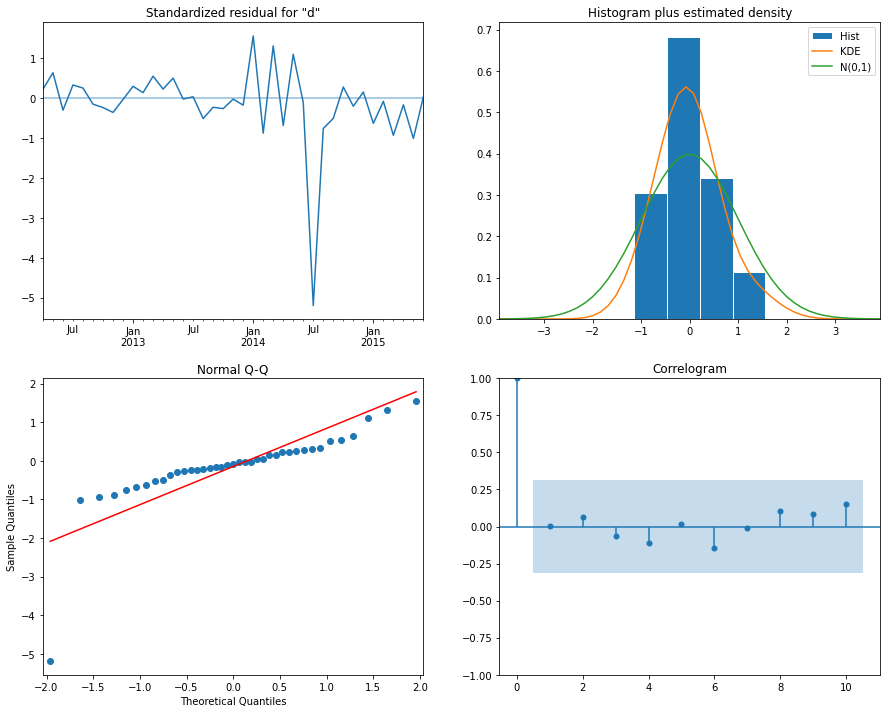

In [ ]:
#let's plot some diagnostics!
results.plot_diagnostics(figsize=(15, 12))
plt.show()

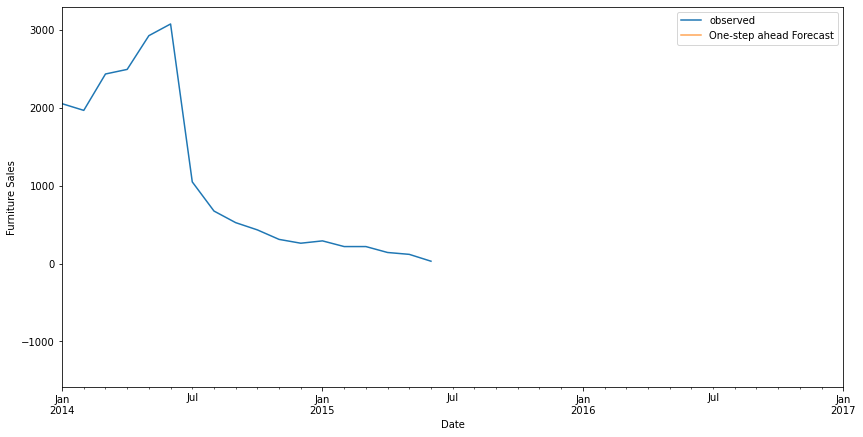

In [ ]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()

ax = y.loc['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))

#ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color = 'k', alpha = .2)
#ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('1958-01-01'), ts_log.index[-1], alpha = .1, zorder = -1)

ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')

plt.legend()
plt.show()

<h2>Important!</h2>
<h3> <b>In the above graph plot there are two lines commented for the reason that they give an unlogical error where everything is fine and when I searched on the internet I couldn't find any explanation for it</b> <br> </h3>
It's a familier standard code for plotting time series forecast and it works fine on the tutorials, so I don't really know what is the real bug :( <br>

The code should fill the right half of the plot with the predicted values

# Modeling and Predicting

In [ ]:
md = users
md

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,traveled
2,4ft3gnwmtx,2010-09-28,2009-06-01,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US,Yes
3,bjjt8pjhuk,2011-12-05,2009-10-01,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other,Yes
6,lsw9q7uk0j,2010-01-02,2010-01-01,2010-01-05,FEMALE,46.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US,Yes
7,0d01nltbrs,2010-01-03,2010-01-01,2010-01-13,FEMALE,47.0,basic,0,en,direct,direct,omg,Web,Mac Desktop,Safari,US,Yes
8,a1vcnhxeij,2010-01-04,2010-01-01,2010-07-29,FEMALE,50.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213412,a1rvlsdijt,2014-06-30,2014-06-01,2015-01-23,FEMALE,50.0,basic,0,en,sem-brand,google,omg,Web,Windows Desktop,Chrome,US,Yes
213439,msucfwmlzc,2014-06-30,2014-06-01,2015-03-16,MALE,43.0,basic,0,en,direct,direct,untracked,Web,Windows Desktop,Firefox,US,Yes
213441,omlc9iku7t,2014-06-30,2014-06-01,2014-08-13,FEMALE,34.0,basic,0,en,direct,direct,linked,Web,Mac Desktop,Chrome,ES,Yes
213443,0k26r3mir0,2014-06-30,2014-06-01,2014-07-13,FEMALE,36.0,basic,0,en,sem-brand,google,linked,Web,Mac Desktop,Safari,US,Yes


In [ ]:
md['date_account_created'] = pd.to_datetime(md['date_account_created'])
md['timestamp_first_active'] = pd.to_datetime((md.timestamp_first_active), format="%Y-%m %H:%M:%S")
md.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51520 entries, 2 to 213445
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       51520 non-null  object        
 1   date_account_created     51520 non-null  datetime64[ns]
 2   timestamp_first_active   51520 non-null  datetime64[ns]
 3   date_first_booking       51520 non-null  datetime64[ns]
 4   gender                   51520 non-null  object        
 5   age                      51520 non-null  float64       
 6   signup_method            51520 non-null  object        
 7   signup_flow              51520 non-null  int64         
 8   language                 51520 non-null  object        
 9   affiliate_channel        51520 non-null  object        
 10  affiliate_provider       51520 non-null  object        
 11  first_affiliate_tracked  51520 non-null  object        
 12  signup_app               51520 

In [ ]:
md['day_account_created'] = md.date_account_created.dt.day
md['month_account_created'] = md.date_account_created.dt.month
md['year_account_created'] = md.date_account_created.dt.year

md['day_first_active'] = md.timestamp_first_active.dt.day
md['month_first_active'] = md.timestamp_first_active.dt.month
md['year_first_active'] = md.timestamp_first_active.dt.year

In [ ]:
md['time_lag'] = (md['date_account_created'] - md['timestamp_first_active'])
md['time_lag'] = md['time_lag'].dt.days
md.drop( ['date_account_created', 'timestamp_first_active'], axis=1, inplace=True)

In [ ]:
#Let us fill -1 in place of NaNs in the age column.
md['age'].fillna(-1, inplace=True)
md.head()

,id,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,...,first_browser,country_destination,traveled,day_account_created,month_account_created,year_account_created,day_first_active,month_first_active,year_first_active,time_lag
2,4ft3gnwmtx,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,...,IE,US,Yes,28,9,2010,1,6,2009,484
3,bjjt8pjhuk,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,...,Firefox,other,Yes,5,12,2011,1,10,2009,795
6,lsw9q7uk0j,2010-01-05,FEMALE,46.0,basic,0,en,other,craigslist,untracked,...,Safari,US,Yes,2,1,2010,1,1,2010,1
7,0d01nltbrs,2010-01-13,FEMALE,47.0,basic,0,en,direct,direct,omg,...,Safari,US,Yes,3,1,2010,1,1,2010,2
8,a1vcnhxeij,2010-07-29,FEMALE,50.0,basic,0,en,other,craigslist,untracked,...,Safari,US,Yes,4,1,2010,1,1,2010,3


In [ ]:
#Creating train set
train_md = trainers
train_md.reset_index()
train_md.fillna(-1, inplace=True)

#Creating target variable for the train dataset
y_train = train_md['country_destination']
train_md.drop(['country_destination', 'id'], axis=1, inplace=True)

label_encoder = LabelEncoder()
encoded_y_train = label_encoder.fit_transform(y_train) #Transforming the target variable using labels

encoded_y_train

array([ 7,  7, 10, ...,  7,  7,  7])

In [ ]:
encoded_y_train.shape

(213451,)

In [ ]:
#Creating test set
test_md = testers
test_md.reset_index(inplace=True)
id_test = test_md['id']
test_md.drop('id', axis=1, inplace=True)

In [ ]:
train_md = train_md.loc[:,~train_md.columns.duplicated()]
test_md = test_md.loc[:,~test_md.columns.duplicated()]

In [ ]:
features = train_md

f1 = label_encoder.fit_transform(features['gender'])
f2 = label_encoder.fit_transform(features['language'])
f3 = label_encoder.fit_transform(features['signup_method'])

fr = {'gender':f1,'language':f2,'signup_method':f3}
fd = pd.DataFrame(fr, columns=['gender','language','signup_method'])

fd.shape

(213451, 3)

For the LinearRegression fit to work we must make sure that the features and the target are the same size<br>
As we can see above in from the shape function, both are 213451

In [ ]:
lm = LinearRegression()
lm

LinearRegression()

In [ ]:
lm.fit(fd,encoded_y_train)

LinearRegression()

In [ ]:
lm.intercept_

7.693972006700784

In [ ]:
lm.coef_

array([ 0.31875481, -0.00384037, -0.31677882])

So our linear function should be like this <br>
<b>country_percent</b> = 7.693972006700784 + 0.31875481 x <b>gender</b> + -0.00384037 x <b>language</b> + -0.31677882 x <b>signup_method</b>

In [ ]:
Y_hat = lm.predict(fd)

In [ ]:
Y_hat

array([7.35799131, 7.99550093, 7.99352494, ..., 7.67477013, 7.67477013,
       7.67477013])

C:\Users\peace\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\peace\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


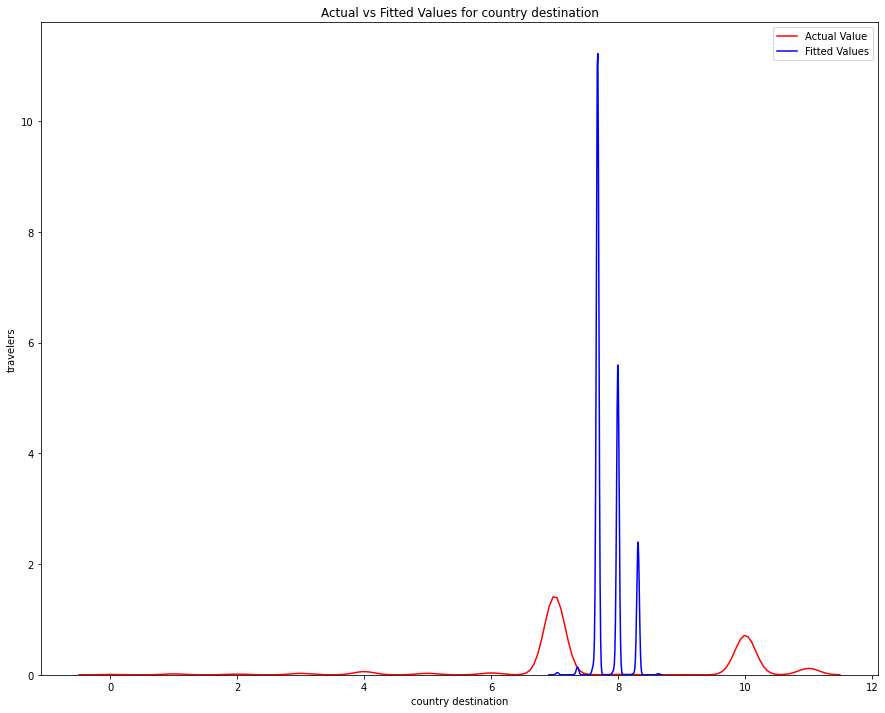

In [ ]:
plt.figure(figsize=(15, 12))


ax1 = sns.distplot(encoded_y_train, hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for country destination')
plt.xlabel('country destination')
plt.ylabel('travelers')

plt.legend()
plt.show()
plt.close()

<h3>As the above plot clearly shows, our fitted data doesn't look right :( </h3>

In [ ]:
print('The R-square is: ', lm.score(fd,encoded_y_train))

The R-square is:  0.014841242783762087


In [ ]:
mse = mean_squared_error(encoded_y_train, Y_hat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  3.559499889299842


<h3>bigger R-squared is better while smaller MSE is preferred</h3>

We didn't really predict the future countries the users would book :(

When I tried to use pipeline for further training and prediction, I faced errors with the necessary function which prevented me from continuing

<h2>Then we decided to try another method! :) </h2>

In [ ]:
md.head()

,id,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,...,first_browser,country_destination,traveled,day_account_created,month_account_created,year_account_created,day_first_active,month_first_active,year_first_active,time_lag
2,4ft3gnwmtx,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,...,IE,US,Yes,28,9,2010,1,6,2009,484
3,bjjt8pjhuk,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,...,Firefox,other,Yes,5,12,2011,1,10,2009,795
6,lsw9q7uk0j,2010-01-05,FEMALE,46.0,basic,0,en,other,craigslist,untracked,...,Safari,US,Yes,2,1,2010,1,1,2010,1
7,0d01nltbrs,2010-01-13,FEMALE,47.0,basic,0,en,direct,direct,omg,...,Safari,US,Yes,3,1,2010,1,1,2010,2
8,a1vcnhxeij,2010-07-29,FEMALE,50.0,basic,0,en,other,craigslist,untracked,...,Safari,US,Yes,4,1,2010,1,1,2010,3


In [ ]:
md.columns

Index(['id', 'date_first_booking', 'gender', 'age', 'signup_method',
       'signup_flow', 'language', 'affiliate_channel', 'affiliate_provider',
       'first_affiliate_tracked', 'signup_app', 'first_device_type',
       'first_browser', 'country_destination', 'traveled',
       'day_account_created', 'month_account_created', 'year_account_created',
       'day_first_active', 'month_first_active', 'year_first_active',
       'time_lag'],
      dtype='object')

In [ ]:
dum = pd.get_dummies(md,columns=['gender', 'signup_method','signup_flow', 'language', 'affiliate_channel', 
                                'affiliate_provider','first_affiliate_tracked', 'signup_app', 
                                'first_device_type','first_browser', 'traveled'])
dum.head()

,id,date_first_booking,age,country_destination,day_account_created,month_account_created,year_account_created,day_first_active,month_first_active,year_first_active,...,first_browser_Safari,first_browser_SeaMonkey,first_browser_Silk,first_browser_SiteKiosk,first_browser_Sogou Explorer,first_browser_Stainless,first_browser_TenFourFox,first_browser_TheWorld Browser,first_browser_Yandex.Browser,traveled_Yes
2,4ft3gnwmtx,2010-08-02,56.0,US,28,9,2010,1,6,2009,...,0,0,0,0,0,0,0,0,0,1
3,bjjt8pjhuk,2012-09-08,42.0,other,5,12,2011,1,10,2009,...,0,0,0,0,0,0,0,0,0,1
6,lsw9q7uk0j,2010-01-05,46.0,US,2,1,2010,1,1,2010,...,1,0,0,0,0,0,0,0,0,1
7,0d01nltbrs,2010-01-13,47.0,US,3,1,2010,1,1,2010,...,1,0,0,0,0,0,0,0,0,1
8,a1vcnhxeij,2010-07-29,50.0,US,4,1,2010,1,1,2010,...,1,0,0,0,0,0,0,0,0,1


In [ ]:
X = dum.drop(columns=['id','country_destination','date_first_booking'])
Y = dum['country_destination']
X.head()

,age,day_account_created,month_account_created,year_account_created,day_first_active,month_first_active,year_first_active,time_lag,gender_FEMALE,gender_MALE,...,first_browser_Safari,first_browser_SeaMonkey,first_browser_Silk,first_browser_SiteKiosk,first_browser_Sogou Explorer,first_browser_Stainless,first_browser_TenFourFox,first_browser_TheWorld Browser,first_browser_Yandex.Browser,traveled_Yes
2,56.0,28,9,2010,1,6,2009,484,1,0,...,0,0,0,0,0,0,0,0,0,1
3,42.0,5,12,2011,1,10,2009,795,1,0,...,0,0,0,0,0,0,0,0,0,1
6,46.0,2,1,2010,1,1,2010,1,1,0,...,1,0,0,0,0,0,0,0,0,1
7,47.0,3,1,2010,1,1,2010,2,1,0,...,1,0,0,0,0,0,0,0,0,1
8,50.0,4,1,2010,1,1,2010,3,1,0,...,1,0,0,0,0,0,0,0,0,1


In [ ]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.3, random_state=1)

In [ ]:
# Feature Scaling
sc = StandardScaler()
Xtrain = sc.fit_transform(Xtrain)
Xtest = sc.transform(Xtest)

In [ ]:
#classifier - clf
clf = RandomForestClassifier(n_estimators = 100) 
clf.fit(Xtrain, Ytrain)
Ypred = clf.predict(Xtest)


In [ ]:
# metrics are used to find accuracy or error
from sklearn import metrics
print()
# using metrics module for accuracy calculation
print("Model accuracy: ", metrics.accuracy_score(Ytest, Ypred))



Model accuracy:  0.6734601449275363


In [ ]:
predicted = pd.DataFrame(Ypred) 
predicted

,0
0,US
1,US
2,US
3,US
4,US
...,...
15451,US
15452,US
15453,US
15454,other


<h2>And that's it, thank you! XD</h2>

<ul>Some issues that faced us:
    <li> most of the content was string and not numerical, even the target which made it more challenging to work with</li>
    <li> we are still new to the career and the load was too much for us since we didn't try working on data before</li>
    <li> a lot of time was consumed figuring out what we needed and what to do</li>
</ul>